# Initialize

In [1]:
"""
DataFitter
Created by Jerry LaRue, larue@chapman.edu, 9/2018
Last modified by Jerry LaRue, larue@chapman.edu, 9/2018
"""

import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import pylab as plb
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

C:\Users\larue\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Parameters

In [2]:
Folder = 'C:/Users/larue/OneDrive - Chapman University/Research/X-Ray Femtochemistry/Fermi 2017/Binned/BT2/'
File_Input = 'XAS_014_020_bin.h5'
File_Output = 'XAS_014_020_bin_fit.h5'

# Fit parameters
Fit_ROI_Min = 287
Fit_ROI_Max = 289
Fit_X_Delta = 0.02
Fit_Reference_NumGauss = 0
Fit_Baseline = 0.02
Fit_Peak1_Amplitude = 0.1
Fit_Peak1_Energy = 288
Fit_Peak1_Width = 0.5
Fit_Peak2_Amplitude = 0.1
Fit_Peak2_Energy = 289
Fit_Peak2_Width = 0.5
Fit_Spectra_NumGauss = 1
Fit_Reference_NumGauss = 0

# Load and trim data

In [103]:
print('Loading data from: ' + File_Input)

##### Check for files #####

Success = True
if os.path.isfile(Folder + File_Input) :
    f = h5py.File(Folder + File_Input, 'r')
else :
    Success = False
    print(File_Input + ' file missing')

if os.path.isfile(Folder + File_Input) :
    
    # General
    if not 'runs' in f :
        Success = False
        print('Run list missing')
    
    # Energy
    if not 'BinnedData/E_bin_centers' in f :
        Success = False
        print('Energy values missing')
    
    # Delay
    if not 'BinnedData/delays_fs' in f :
        Success = False
        print('Delay Values missing')
    
    # Spectra
    if not 'BinnedData/XAS_2dmatrix' in f :
        Success = False
        print('Spectral data missing')

if Success :

    ##### Load data #####

    # General
    Runs = f['runs'][...]

    # Energy
    Spectra_Energy = f['BinnedData/E_bin_centers'][...]

    # Delay
    Spectra_Delay = f['BinnedData/delays_fs'][...]

    # Spectra
    Spectra_Values = f['/BinnedData/XAS_2dmatrix'][...]

    f.close()
    
    ###### Trim data #####
    
    # Data Range
    X_Index_Min = (np.abs(Spectra_Energy - Fit_ROI_Min)).argmin()
    X_Index_Max = (np.abs(Spectra_Energy - Fit_ROI_Max)).argmin()
    Spectra_Values = np.transpose(Spectra_Values)
    Spectra_Values = Spectra_Values[X_Index_Min:X_Index_Max]
    Spectra_Values = np.transpose(Spectra_Values)
    Spectra_Energy = Spectra_Energy[X_Index_Min:X_Index_Max]

Loading data from: XAS_014_020_bin.h5


## Fit reference data

288.4094227193017
____________________________________________________________________________________________________


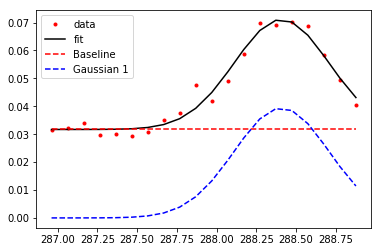

Baseline: 0.0317
Peak 1 | Amplitude: 0.0294, Energy: 288.4, Width: 0.298


In [158]:
##### Fit reference data #####

# Use negative delays for the reference data.

# Select index of reference data

Reference_Index = 0
    
# Find fits
remove = np.argwhere(np.isnan(Spectra_Values[Reference_Index]))
x = np.delete(Spectra_Energy,remove)
y = np.delete(Spectra_Values[Reference_Index],remove)
n = len(x)

peaks = GaussianModel(prefix='G1_')
background = LinearModel(prefix='B_')
model = peaks + background

params = model.make_params(B_slope=0, B_intercept=0.05, 
                           G1_center=288.409422, G1_sigma=0.29755441, G1_amplitude=0.050,
                           G2_center=287.8, G2_sigma=0.3, G2_amplitude=0.050)

params['B_slope'].vary = False

ref = model.fit(y, params, x=x)

print(ref.params['G1_center'].value)
comps = ref.eval_components(ref.params, x=x)

# Create fit spectra
Fit_Energy = list()
Fit_Values = list()
j = 0
while j*Fit_X_Delta+round(min(Spectra_Energy),1) <= round(max(Spectra_Energy),1) :
    Fit_Energy.append(j*Fit_X_Delta+round(min(Spectra_Energy)))
#        Fit_Values.append()
    j += 1

# Plot data and fits
print('____________________________________________________________________________________________________')

plt.plot(x, y,'r.', label='data')
plt.plot(x, ref.best_fit, 'k-', label='fit')
plt.plot(x, comps['B_'], 'r--', label='Baseline')
plt.plot(x, comps['G1_'], 'b--', label='Gaussian 1')
plt.legend()
plt.show()

print('Baseline: '+str(round(ref.params['B_intercept'].value,4)))
print('Peak 1 | Amplitude: ' + str(round(ref.params['G1_amplitude'].value,4)) + ', Energy: ' + str(round(ref.params['G1_center'].value,1)) + ', Width: ' + str(round(ref.params['G1_sigma'].value,3)))


____________________________________________________________________________________________________


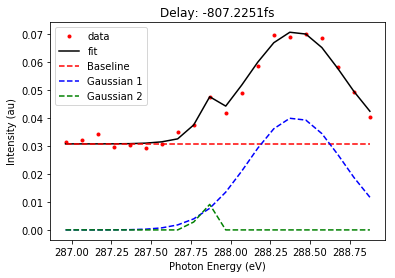

Baseline: 0.0308
Gaussian 1 | Amplitude: 0.03, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0019, Energy: 287.8, Width: 0.028
____________________________________________________________________________________________________


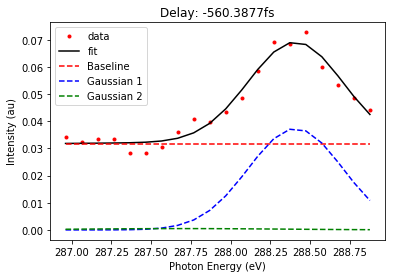

Baseline: 0.0316
Gaussian 1 | Amplitude: 0.0278, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0008, Energy: 287.7, Width: 0.631
____________________________________________________________________________________________________


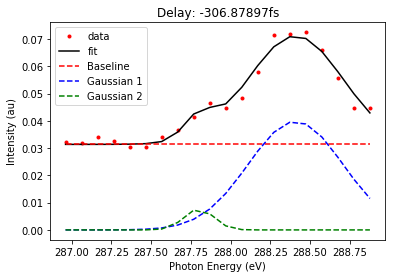

Baseline: 0.0314
Gaussian 1 | Amplitude: 0.0297, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0018, Energy: 287.8, Width: 0.093
____________________________________________________________________________________________________


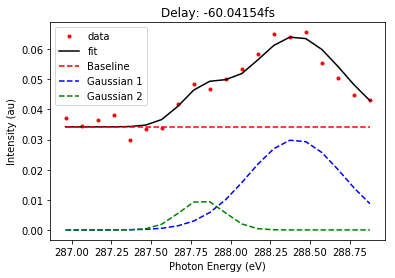

Baseline: 0.0342
Gaussian 1 | Amplitude: 0.0224, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0035, Energy: 287.8, Width: 0.139
____________________________________________________________________________________________________


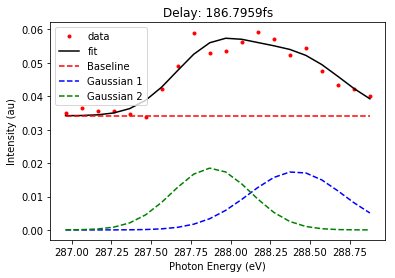

Baseline: 0.0342
Gaussian 1 | Amplitude: 0.013, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0115, Energy: 287.9, Width: 0.247
____________________________________________________________________________________________________


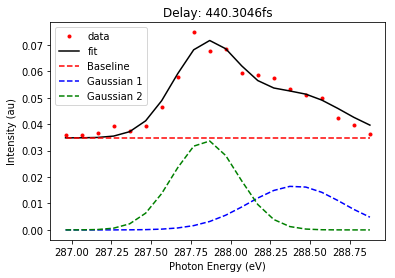

Baseline: 0.0348
Gaussian 1 | Amplitude: 0.0124, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0175, Energy: 287.8, Width: 0.206
____________________________________________________________________________________________________


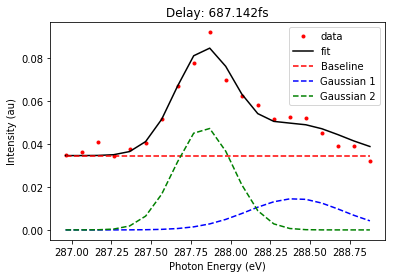

Baseline: 0.0346
Gaussian 1 | Amplitude: 0.0109, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0221, Energy: 287.8, Width: 0.184
____________________________________________________________________________________________________


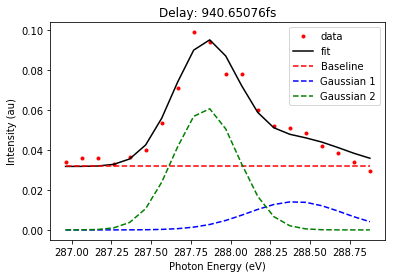

Baseline: 0.0317
Gaussian 1 | Amplitude: 0.0105, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.031, Energy: 287.8, Width: 0.203
____________________________________________________________________________________________________


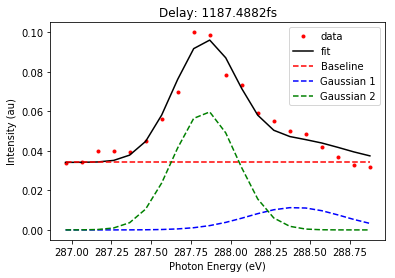

Baseline: 0.0342
Gaussian 1 | Amplitude: 0.0085, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0304, Energy: 287.8, Width: 0.201
____________________________________________________________________________________________________


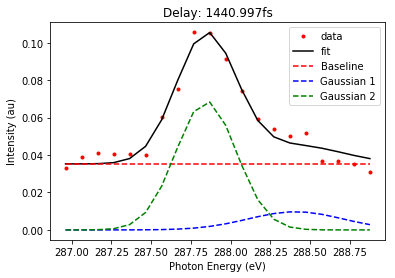

Baseline: 0.0353
Gaussian 1 | Amplitude: 0.0072, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0329, Energy: 287.8, Width: 0.191
____________________________________________________________________________________________________


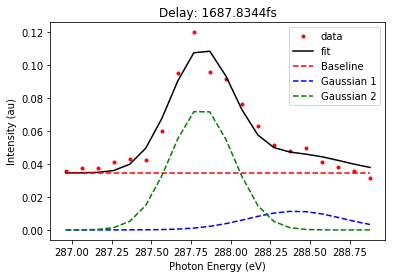

Baseline: 0.0346
Gaussian 1 | Amplitude: 0.0085, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0366, Energy: 287.8, Width: 0.197
____________________________________________________________________________________________________


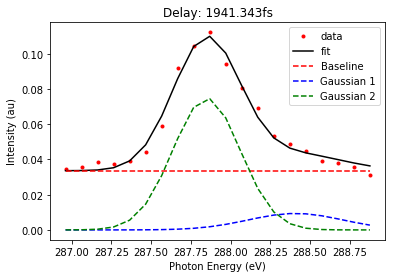

Baseline: 0.0336
Gaussian 1 | Amplitude: 0.007, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0398, Energy: 287.8, Width: 0.212
____________________________________________________________________________________________________


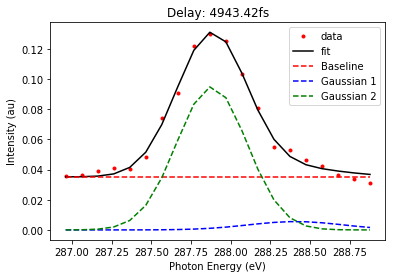

Baseline: 0.0352
Gaussian 1 | Amplitude: 0.0041, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0527, Energy: 287.9, Width: 0.221
____________________________________________________________________________________________________


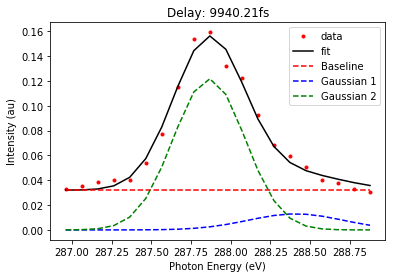

Baseline: 0.032
Gaussian 1 | Amplitude: 0.0096, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0687, Energy: 287.9, Width: 0.225
____________________________________________________________________________________________________


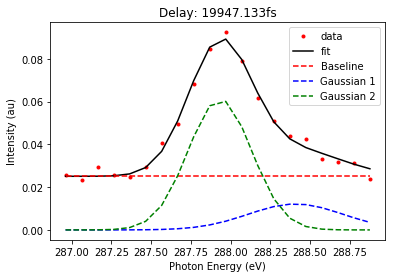

Baseline: 0.0251
Gaussian 1 | Amplitude: 0.009, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0307, Energy: 287.9, Width: 0.2
____________________________________________________________________________________________________


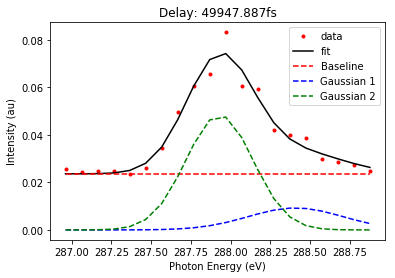

Baseline: 0.0236
Gaussian 1 | Amplitude: 0.0069, Energy: 288.4, Width: 0.298
Gaussian 2 | Amplitude: 0.0257, Energy: 287.9, Width: 0.212
____________________________________________________________________________________________________


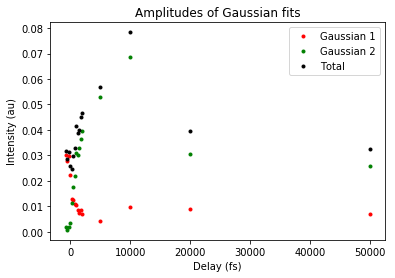

In [187]:
##### Fit data #####

# The peak position and width of the reference data are fixed for fitting.
# A second Gaussian peak is used to fit changes in data from the reference data.
# In the past, I have used multiple peaks, however 1 for reference and 1 for data work well here.

Gaussian1_Amplitude = list()
Gaussian2_Amplitude = list()

i = 0
while i < len(Spectra_Delay) :
    
    # Find fits
    remove = np.argwhere(np.isnan(Spectra_Values[i]))
    x = np.delete(Spectra_Energy,remove)
    y = np.delete(Spectra_Values[i],remove)
    n = len(x)
    
    peaks = GaussianModel(prefix='G1_') + GaussianModel(prefix='G2_')
    background = LinearModel(prefix='B_')
    model = peaks + background

    params = model.make_params(B_slope=0, B_intercept=0.05, 
                               G1_center=ref.params['G1_center'].value, G1_sigma=ref.params['G1_sigma'].value, G1_amplitude=0.050,
                               G2_center=287.8, G2_sigma=0.3, G2_amplitude=0.050)
    
    params['G2_center'].min = 287
    params['G2_center'].max = 290
    params['G2_sigma'].max = 1
    params['B_slope'].vary = False
    params['G1_center'].vary = False
    params['G1_sigma'].vary = False
    
    result = model.fit(y, params, x=x)
    
    comps = result.eval_components(result.params, x=x)
    #print(result.fit_report())
    
    # Create fit spectra
    Fit_Energy = list()
    Fit_Values = list()
    j = 0
    while j*Fit_X_Delta+round(min(Spectra_Energy),1) <= round(max(Spectra_Energy),1) :
        Fit_Energy.append(j*Fit_X_Delta+round(min(Spectra_Energy)))
#        Fit_Values.append()
        j += 1
    
    # Plot data and fits
    print('____________________________________________________________________________________________________')
    
    plt.plot(x, y,'r.', label='data')
    plt.plot(x, result.best_fit, 'k-', label='fit')
    plt.plot(x, comps['B_'], 'r--', label='Baseline')
    plt.plot(x, comps['G1_'], 'b--', label='Gaussian 1')
    plt.plot(x, comps['G2_'], 'g--', label='Gaussian 2')
    plt.legend(), plt.xlabel('Photon Energy (eV)'), plt.ylabel('Intensity (au)')
    plt.title('Delay: ' + str(Spectra_Delay[i]) + 'fs')
    plt.show()
    
    print('Baseline: '+str(round(result.params['B_intercept'].value,4)))
    print('Gaussian 1 | Amplitude: ' + str(round(result.params['G1_amplitude'].value,4)) + ', Energy: ' + str(round(result.params['G1_center'].value,1)) + ', Width: ' + str(round(result.params['G1_sigma'].value,3)))
    print('Gaussian 2 | Amplitude: ' + str(round(result.params['G2_amplitude'].value,4)) + ', Energy: ' + str(round(result.params['G2_center'].value,1)) + ', Width: ' + str(round(result.params['G2_sigma'].value,3)))
    
    Gaussian1_Amplitude.append(result.params['G1_amplitude'].value)
    Gaussian2_Amplitude.append(result.params['G2_amplitude'].value)
    
    i += 1

# Plot trends
print('____________________________________________________________________________________________________')

Gaussian1_Amplitude = np.array(Gaussian1_Amplitude)
Gaussian2_Amplitude = np.array(Gaussian2_Amplitude)
Total_Amplitude = Gaussian1_Amplitude + Gaussian2_Amplitude
plt.plot(Spectra_Delay, Gaussian1_Amplitude,'r.', label='Gaussian 1')
plt.plot(Spectra_Delay, Gaussian2_Amplitude,'g.', label='Gaussian 2')
plt.plot(Spectra_Delay, Total_Amplitude,'k.', label='Total')
plt.legend(), plt.xlabel('Delay (fs)'), plt.ylabel('Intensity (au)')
plt.title('Amplitudes of Gaussian fits')
plt.show()

## Save data

In [183]:
##### Save to file #####

# Output File
if Folder + File_Output == Folder + File_Input :
    f = h5py.File(Folder + File_Output, 'a')
else :
    if not os.path.exists(Folder):
        os.makedirs(Folder)
    f = h5py.File(Folder + File_Output, 'w')
dt = h5py.special_dtype(vlen=bytes)

print('Saving fits to:')
print(Folder + File_Output)

# General
dataSet = f.create_dataset('Runs', data = Runs, dtype = 'int32')

# Delay
dataSetText = f.create_dataset('Delays', data = Spectra_Delay, dtype = np.dtype('float64'))

# Energy
dataSet = f.create_dataset('Spectra_Energy', data = Spectra_Energy, dtype = np.dtype('float64'))

# Data
dataSet = f.create_dataset('Spectra_Values', data = Spectra_Values, dtype = np.dtype('float64'))

# Energy
dataSet = f.create_dataset('Fit_Energy', data = Fit_Energy, dtype = np.dtype('float64'))

# Fits
dataSet = f.create_dataset('Fit_Values', data = Fit_Values, dtype = np.dtype('float64'))
if Fit_Reference_NumGauss > 0 :
    dataSet = f.create_dataset('Fit/Reference', data = Fit_Spectra_Reference, dtype = np.dtype('float64'))

f.close()

print('Done\n')

Saving fits to:
C:/Users/larue/OneDrive - Chapman University/Research/X-Ray Femtochemistry/Fermi 2017/Binned/BT2/XAS_014_020_bin_fit.h5
Done

